# Week 1: Setup + EDA

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Data

In [2]:
df = pd.read_csv("../../../../data/heart_attack_prediction_dataset.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## 3. Data Quality Checks

3.1 Missing Values

In [3]:
# missing values
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

3.2 Duplicates

In [4]:
# duplicated rows
df.duplicated().sum()

np.int64(0)

3.3 Data Types Consistency

In [5]:
# data types
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [6]:
# some cleaning of variables
df.drop(columns=['Patient ID'], inplace=True)  # dropping ID column

In [7]:
# Extract systolic and diastolic blood pressure
df[['systolic_bp', 'diastolic_bp']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Display the results
print("Original vs Extracted:")
print(df[['Blood Pressure', 'systolic_bp', 'diastolic_bp']].head())

# Basic statistics
print("\nSystolic BP Stats:")
print(df['systolic_bp'].describe())
print("\nDiastolic BP Stats:")
print(df['diastolic_bp'].describe())

# Create blood pressure categories based on medical standards
def categorize_bp(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif (systolic >= 130 and systolic < 140) or (diastolic >= 80 and diastolic < 90):
        return 'Stage 1 Hypertension'
    elif systolic >= 140 or diastolic >= 90:
        return 'Stage 2 Hypertension'
    else:
        return 'Hypertensive Crisis'

df['bp_category'] = df.apply(lambda x: categorize_bp(x['systolic_bp'], x['diastolic_bp']), axis=1)
df.drop(columns=['Blood Pressure'], inplace=True)

Original vs Extracted:
  Blood Pressure  systolic_bp  diastolic_bp
0         158/88          158            88
1         165/93          165            93
2         174/99          174            99
3        163/100          163           100
4          91/88           91            88

Systolic BP Stats:
count    8763.000000
mean      135.075659
std        26.349976
min        90.000000
25%       112.000000
50%       135.000000
75%       158.000000
max       180.000000
Name: systolic_bp, dtype: float64

Diastolic BP Stats:
count    8763.000000
mean       85.156111
std        14.676565
min        60.000000
25%        72.000000
50%        85.000000
75%        98.000000
max       110.000000
Name: diastolic_bp, dtype: float64


3.4 Outliers (domain checks, IQR/z-score)

In [8]:
# 1. Identify and separate binary variables
binary_vars = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 
               'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']

# 2. Convert binary variables to categorical
for var in binary_vars:
    df[var] = df[var].astype('category')

# 3. Re-plot only truly continuous variables
continuous_vars = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
                   'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
                   'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Stress Level']

# 4. Investigate outliers for domain validity
print("Outlier investigation:")
for var in continuous_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[var] < Q1 - 1.5*IQR) | (df[var] > Q3 + 1.5*IQR)][var]
    print(f"{var}: {len(outliers)} outliers, range: {outliers.min():.1f} - {outliers.max():.1f}")

Outlier investigation:
Age: 0 outliers, range: nan - nan
Cholesterol: 0 outliers, range: nan - nan
Heart Rate: 0 outliers, range: nan - nan
Exercise Hours Per Week: 0 outliers, range: nan - nan
Sedentary Hours Per Day: 0 outliers, range: nan - nan
Income: 0 outliers, range: nan - nan
BMI: 0 outliers, range: nan - nan
Triglycerides: 0 outliers, range: nan - nan
Physical Activity Days Per Week: 0 outliers, range: nan - nan
Sleep Hours Per Day: 0 outliers, range: nan - nan
Stress Level: 0 outliers, range: nan - nan


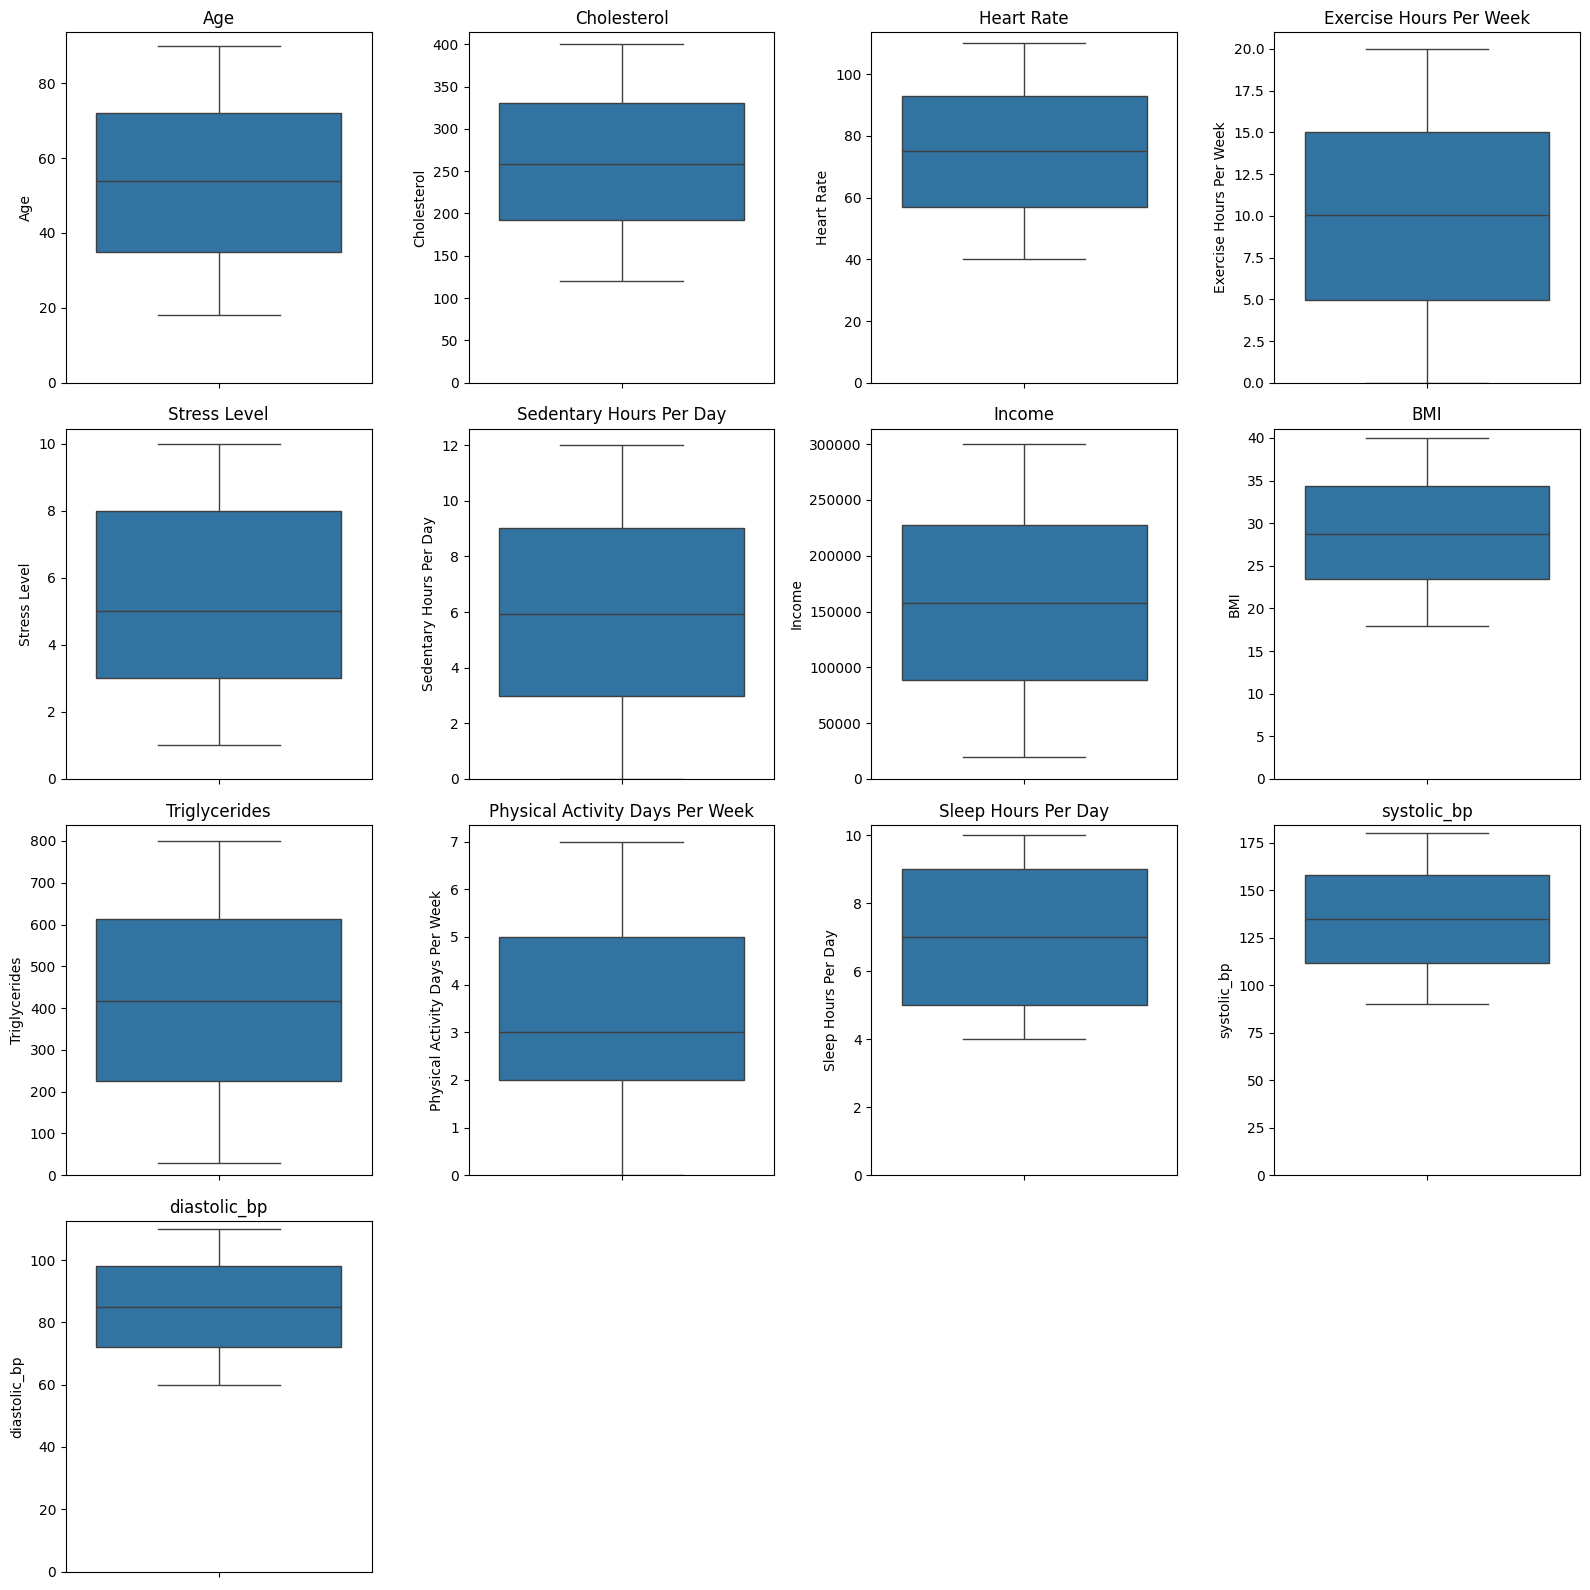

In [9]:
# Display boxplots for all numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns
num_cols = len(numeric_columns)

# Calculate grid dimensions dynamically
cols_per_row = 4
rows_needed = (num_cols + cols_per_row - 1) // cols_per_row  # Ceiling division

plt.figure(figsize=(16, 4 * rows_needed))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(rows_needed, cols_per_row, i)
    sns.boxplot(y=df[column])
    plt.title(f'{column}')
    plt.ylim(0, None)  # Set y-axis to start from 0

plt.tight_layout()
plt.show()

## 4. Exploratory Data Analysis (EDA)

4.1 Univariate Distributions (histograms, KDE, boxplots)

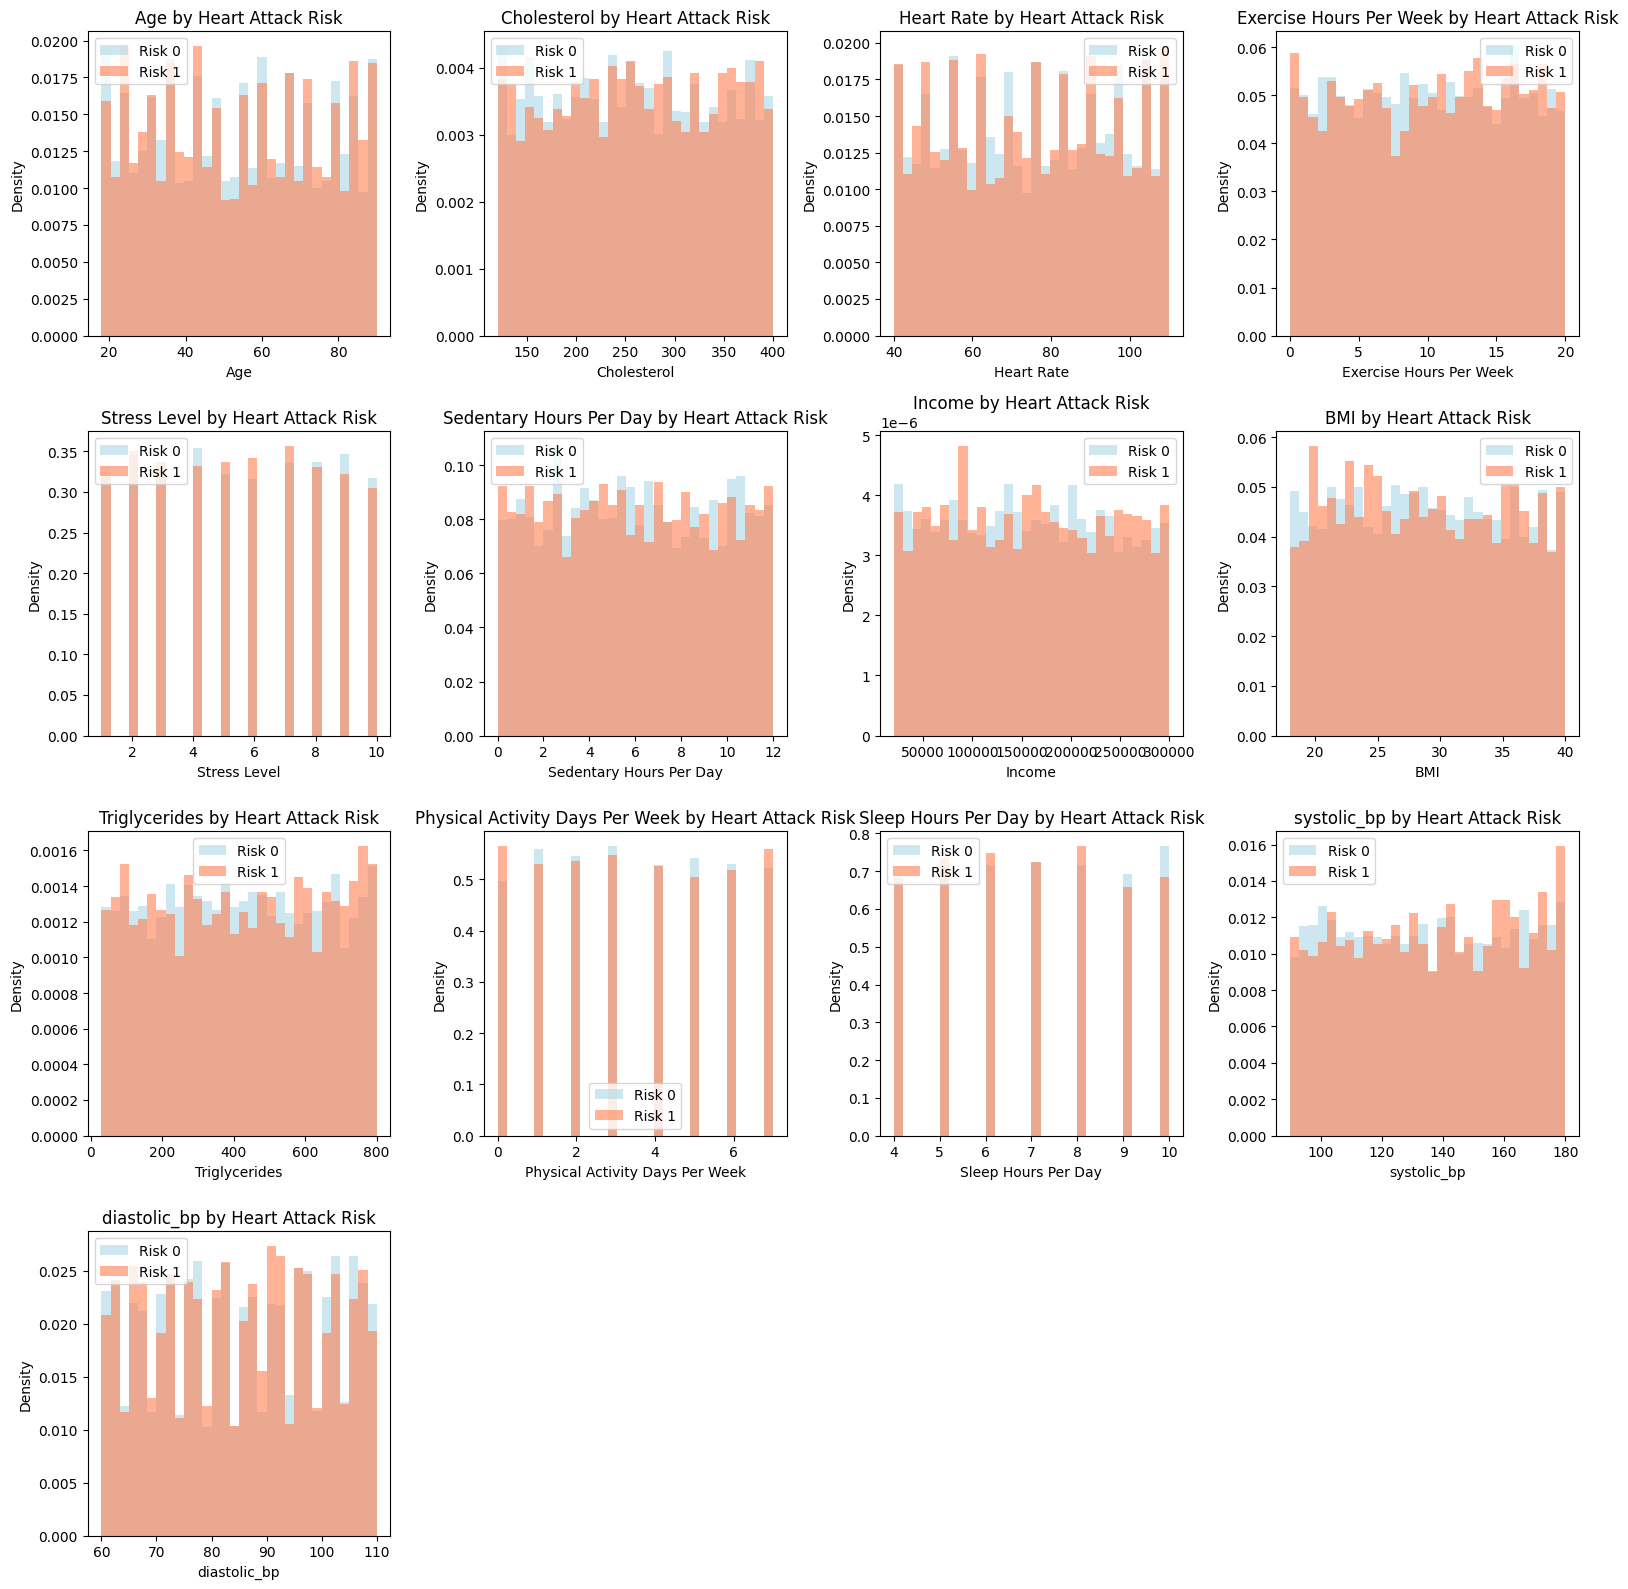

In [10]:
# Plot histogram distributions with separate subplots for each target class
target_var = 'Heart Attack Risk'
numeric_columns = df.select_dtypes(include=np.number).columns
num_cols = len(numeric_columns)

cols_per_row = 4
rows_needed = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows_needed, cols_per_row, figsize=(16, 4 * rows_needed))
if rows_needed == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for i, column in enumerate(numeric_columns):
    if i < len(axes):
        # Plot overlapping histograms
        for risk_level in [0, 1]:
            subset = df[df[target_var] == risk_level]
            axes[i].hist(subset[column], bins=30, alpha=0.6, 
                        label=f'Risk {risk_level}', 
                        color='lightblue' if risk_level == 0 else 'coral',
                        density=True)
        
        axes[i].set_title(f'{column} by {target_var}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')
        axes[i].legend()

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

4.2 Bivariate Relationships (scatter, groupby stats)

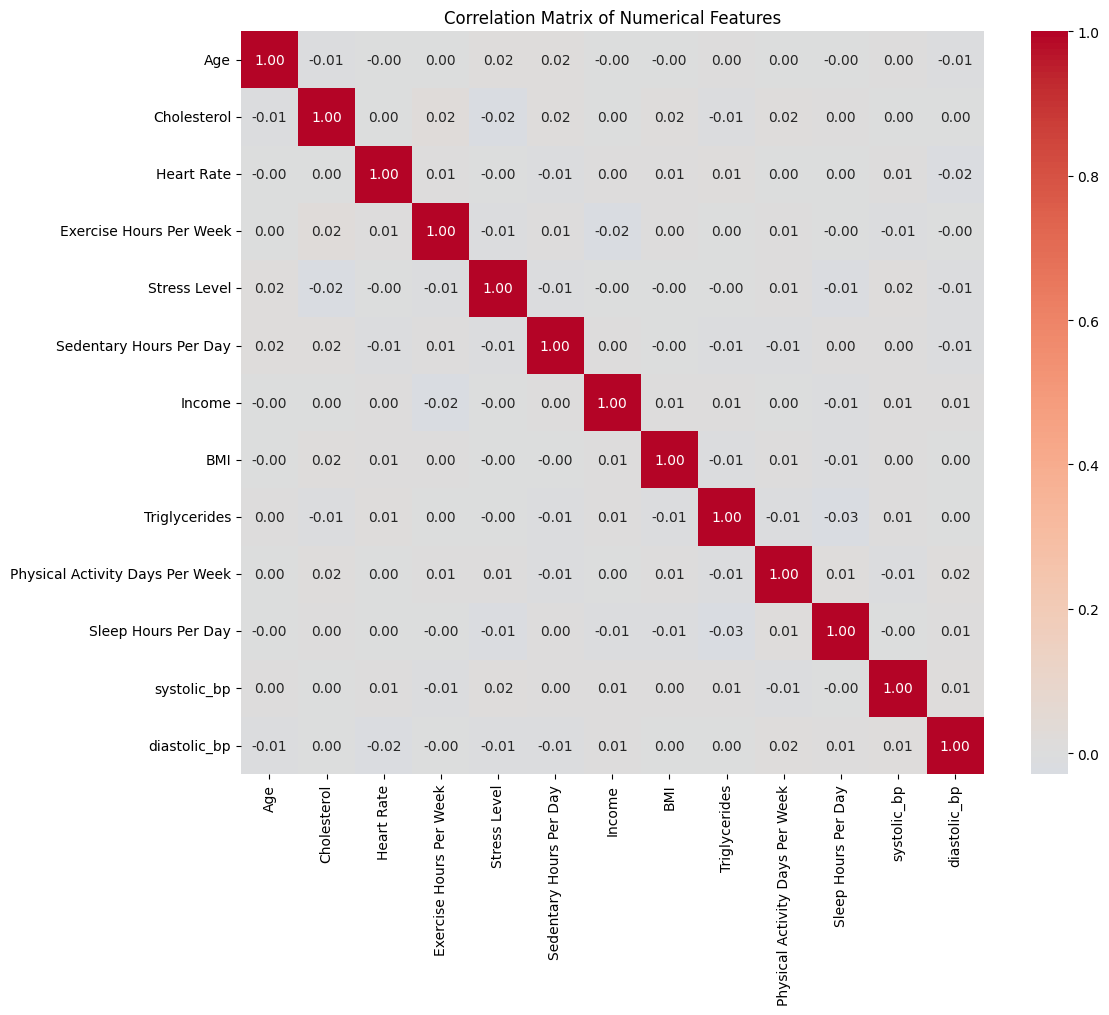

In [11]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

4.4 Target Variable (`y`) Inspection

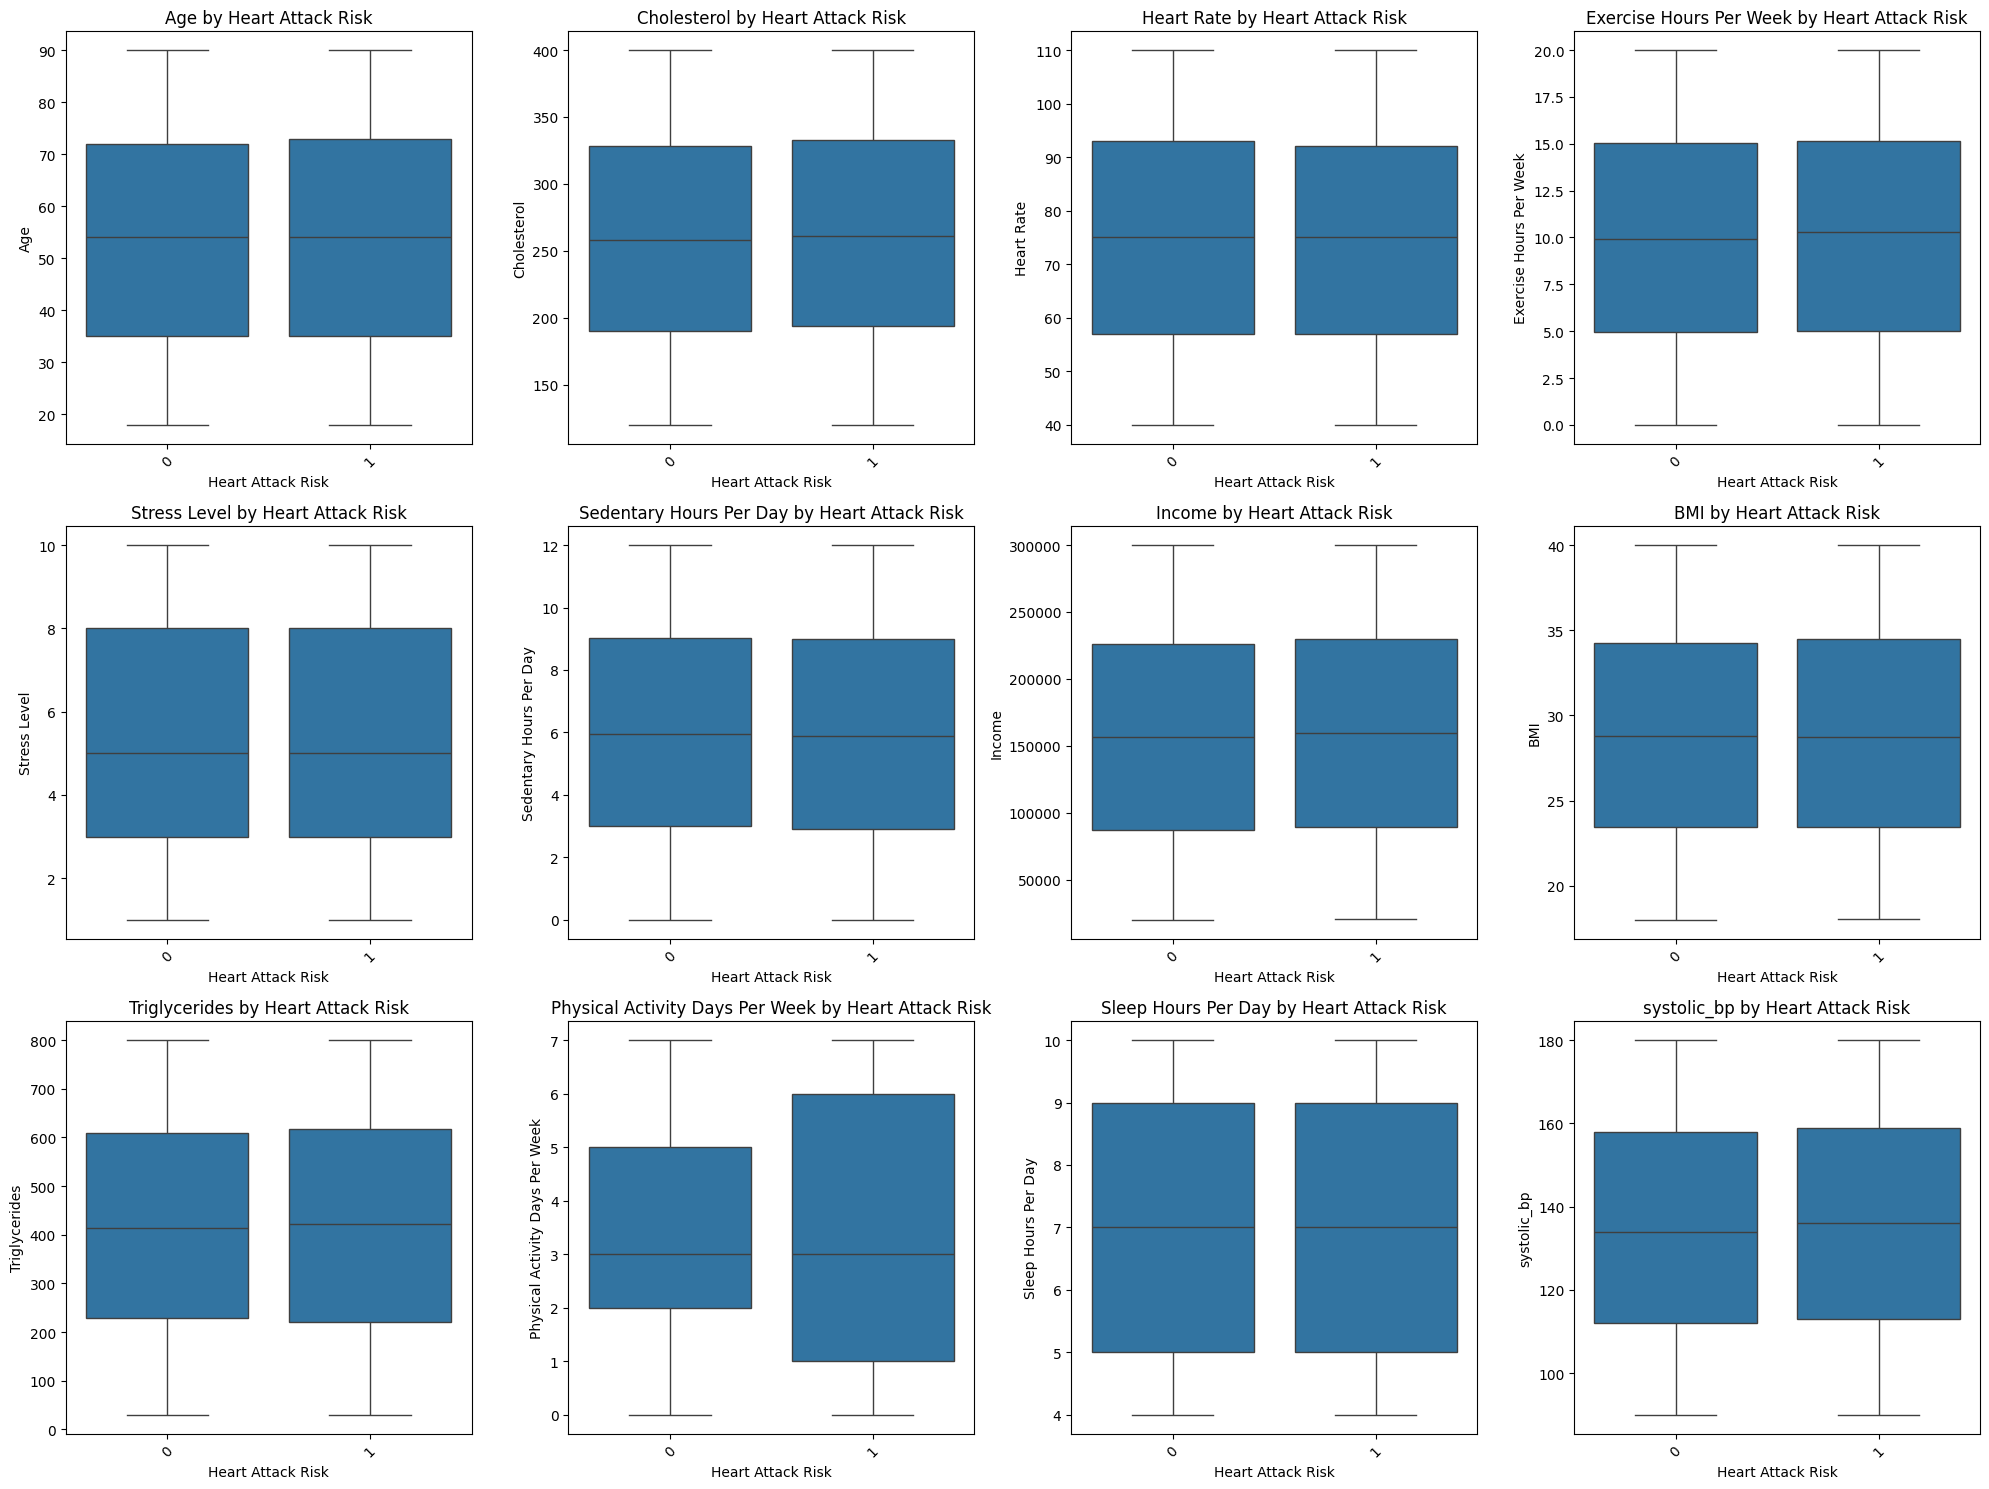

In [12]:
target_var = 'Heart Attack Risk'

# Numerical features vs target variable
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if target_var in numerical_features:
    numerical_features.remove(target_var)

# Create scatter plots for numerical features vs target
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        # Box plot for numerical feature by target categories
        sns.boxplot(data=df, x=target_var, y=feature, ax=axes[i])
        axes[i].set_title(f'{feature} by {target_var}')
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

4.5 Class Balance (counts, %)

In [13]:
# Count and percentage distribution
class_counts = df[target_var].value_counts()
class_percentages = df[target_var].value_counts(normalize=True) * 100

print(f"\nClass Distribution:")
print(f"Class Counts:")
print(class_counts)
print(f"\nClass Percentages:")
for class_val, percentage in class_percentages.items():
    print(f"Class {class_val}: {percentage:.2f}%")


Class Distribution:
Class Counts:
Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

Class Percentages:
Class 0: 64.18%
Class 1: 35.82%


Categorical Feature Relationships Analysis

In [14]:
# Analyze categorical features vs Heart Attack Risk
target_var = 'Heart Attack Risk'

# Get categorical features (excluding target)
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
if target_var in categorical_features:
    categorical_features.remove(target_var)

print("="*60)
print("CATEGORICAL FEATURES ANALYSIS vs HEART ATTACK RISK")
print("="*60)

# For each categorical feature, analyze its relationship with target
for feature in categorical_features:
    print(f"\n{feature.upper()}:")
    
    # Cross-tabulation with counts
    crosstab_counts = pd.crosstab(df[feature], df[target_var], margins=True)
    print("Counts:")
    print(crosstab_counts)
    
    # Cross-tabulation with percentages (by feature category)
    crosstab_pct = pd.crosstab(df[feature], df[target_var], normalize='index') * 100
    print("\nHeart Attack Risk Percentages by category:")
    print(crosstab_pct.round(1))
    
    # Calculate risk difference
    risk_0 = crosstab_pct.loc[0, 1] if 0 in crosstab_pct.index else 0
    risk_1 = crosstab_pct.loc[1, 1] if 1 in crosstab_pct.index else 0
    risk_difference = abs(risk_1 - risk_0)
    
    print(f"Risk difference: {risk_difference:.1f} percentage points")
    
    if risk_difference > 15:
        print("STRONG pattern - High predictive value")
    elif risk_difference > 5:
        print("MODERATE pattern - Some predictive value") 
    else:
        print("WEAK pattern - Low predictive value")
    
    print("-" * 50)

CATEGORICAL FEATURES ANALYSIS vs HEART ATTACK RISK

SEX:
Counts:
Heart Attack Risk     0     1   All
Sex                                
Female             1708   944  2652
Male               3916  2195  6111
All                5624  3139  8763

Heart Attack Risk Percentages by category:
Heart Attack Risk     0     1
Sex                          
Female             64.4  35.6
Male               64.1  35.9
Risk difference: 0.0 percentage points
WEAK pattern - Low predictive value
--------------------------------------------------

DIABETES:
Counts:
Heart Attack Risk     0     1   All
Diabetes                           
0                  1990  1057  3047
1                  3634  2082  5716
All                5624  3139  8763

Heart Attack Risk Percentages by category:
Heart Attack Risk     0     1
Diabetes                     
0                  65.3  34.7
1                  63.6  36.4
Risk difference: 1.7 percentage points
WEAK pattern - Low predictive value
---------------------------

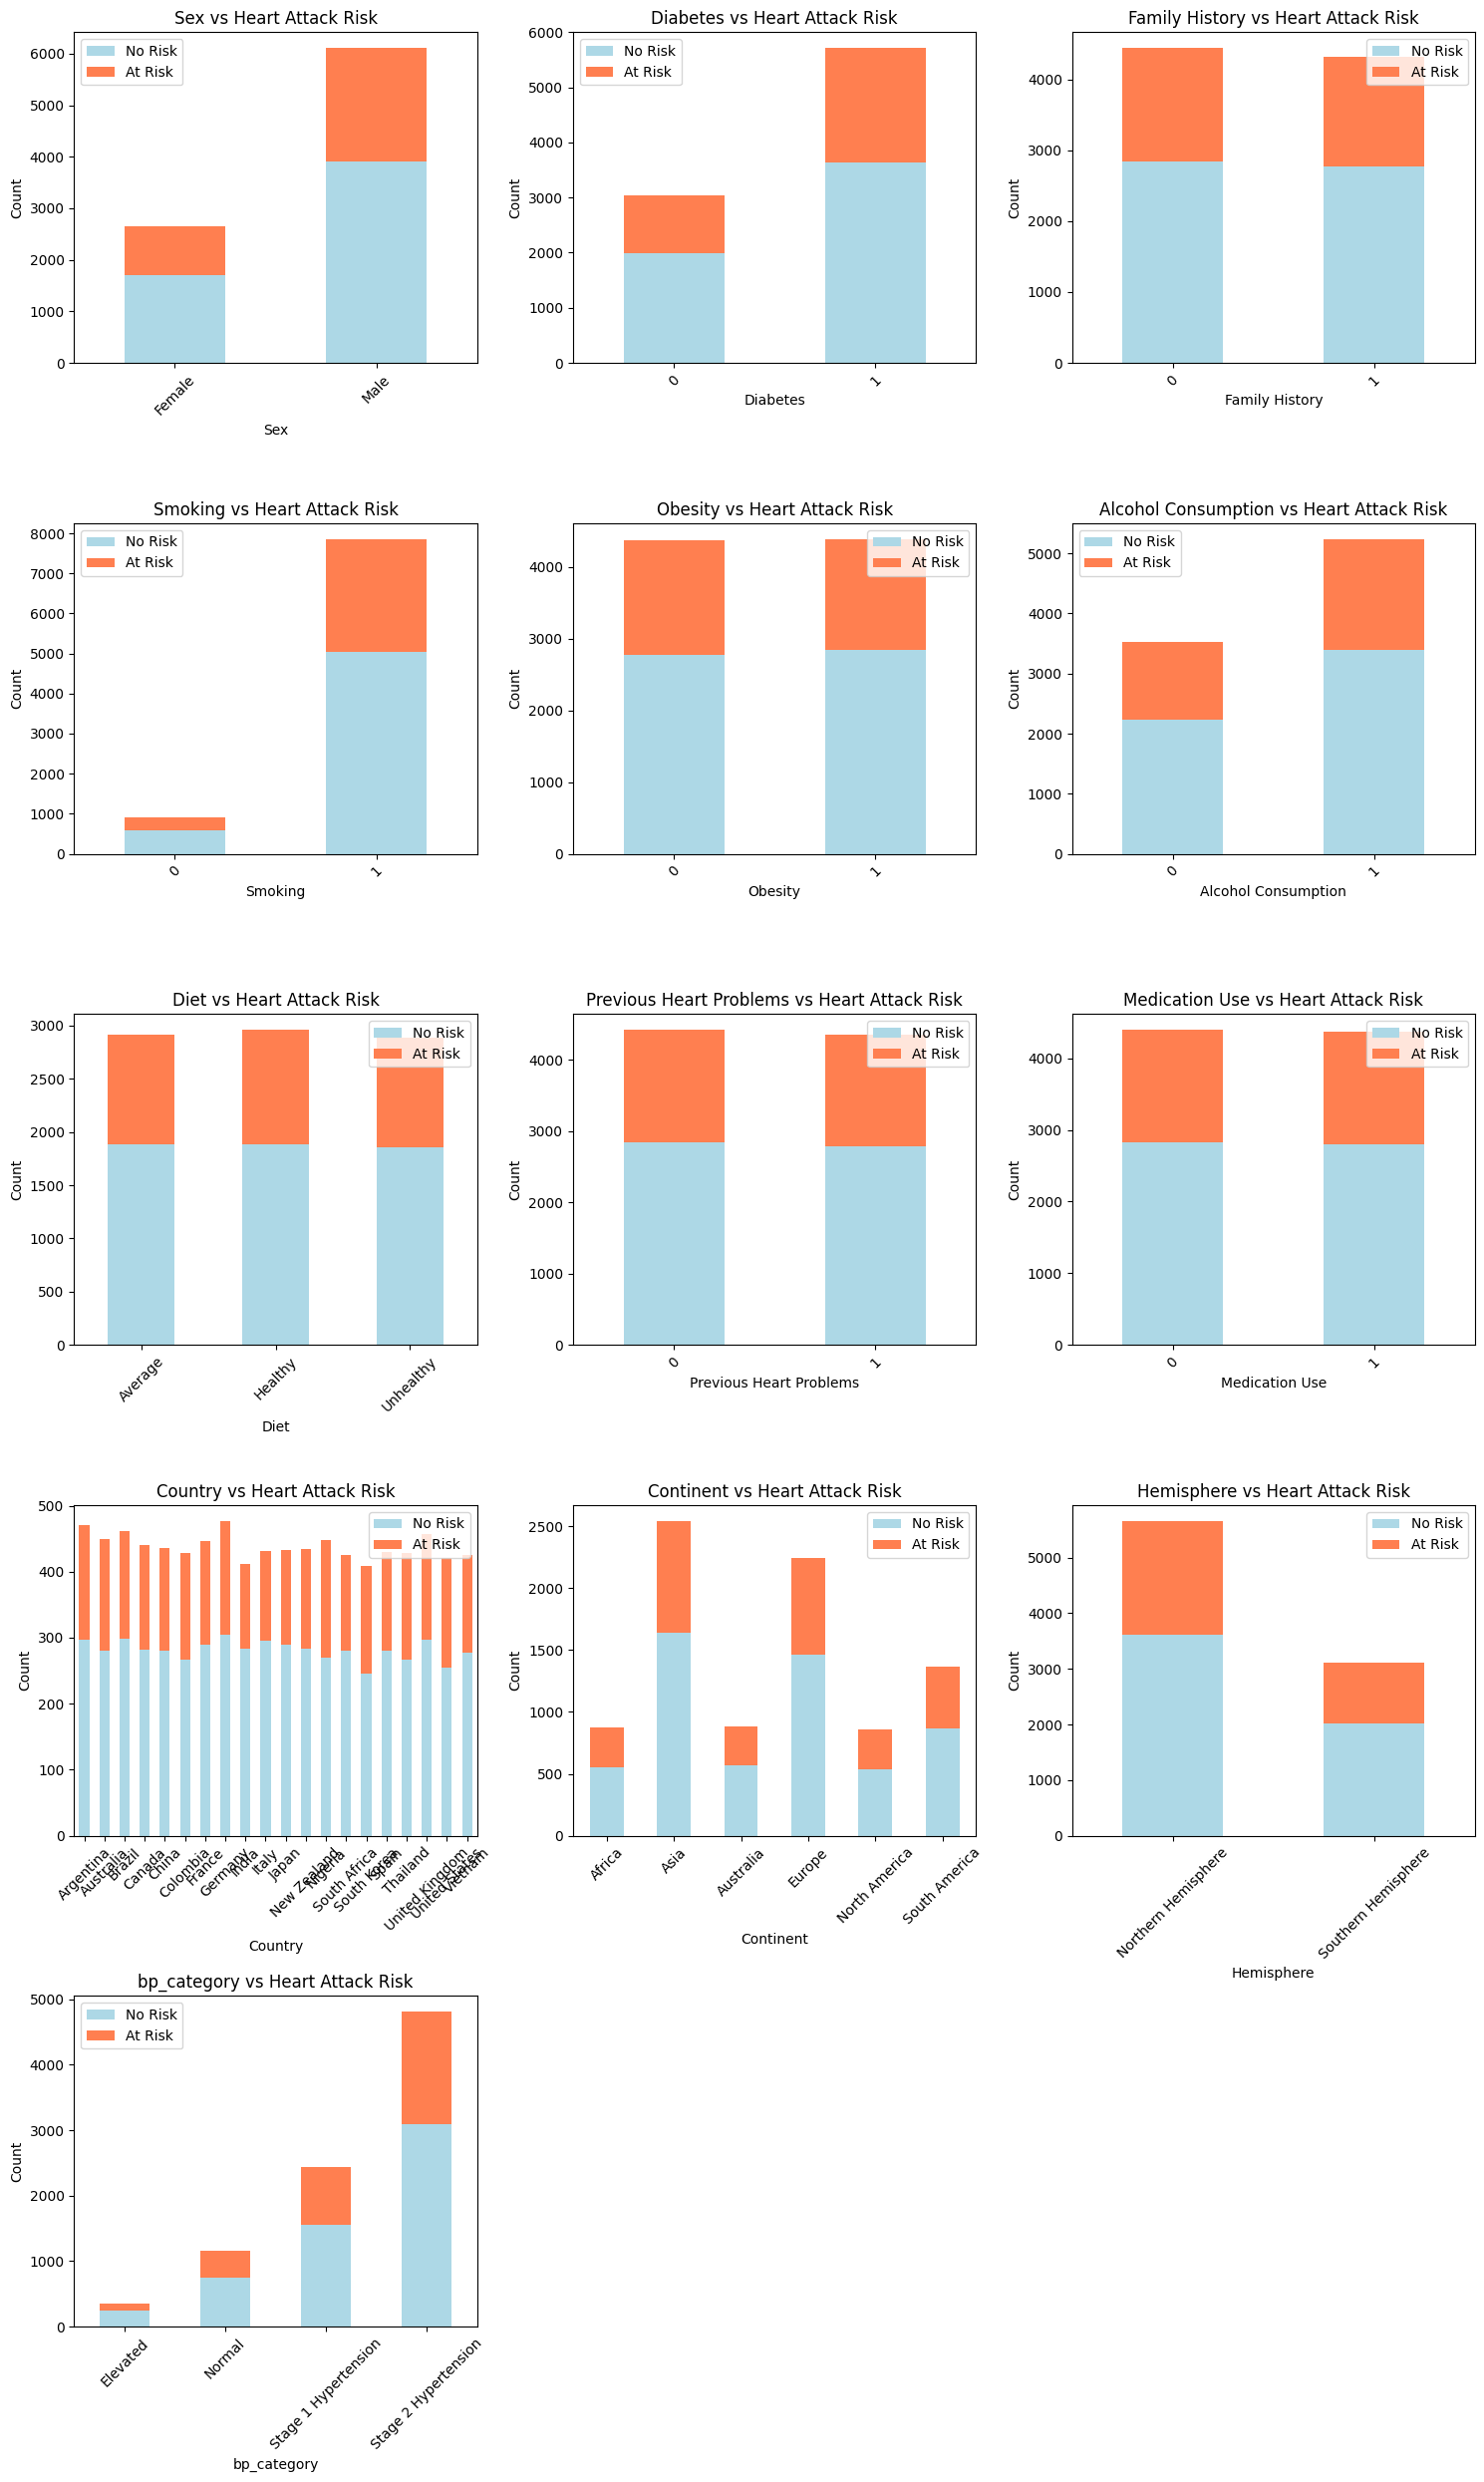

In [15]:
# Visualizations
n_features = len(categorical_features)
cols = 3
rows = (n_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
if n_features == 1:
    axes = [axes]
else:
    axes = axes.flatten() if rows > 1 else axes

for i, feature in enumerate(categorical_features):
    # Create stacked bar chart
    crosstab = pd.crosstab(df[feature], df[target_var])
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], 
                  color=['lightblue', 'coral'])
    axes[i].set_title(f'{feature} vs Heart Attack Risk')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(['No Risk', 'At Risk'])
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
# Statistical significance test (Chi-square) - Tabular Format
from scipy.stats import chi2_contingency

print("\nSTATISTICAL SIGNIFICANCE (Chi-square test):")
print("="*70)

# Create lists to store results
results = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target_var])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Determine significance level
    if p_value < 0.001:
        significance = "HIGHLY SIGNIFICANT"
    elif p_value < 0.05:
        significance = "SIGNIFICANT"
    else:
        significance = "NOT SIGNIFICANT"
    
    # Add to results
    results.append({
        'Feature': feature,
        'Chi-square': chi2,
        'p-value': p_value,
        'Significance': significance
    })

# Create DataFrame and display
chi_square_results = pd.DataFrame(results)
chi_square_results['Chi-square'] = chi_square_results['Chi-square'].round(3)
chi_square_results['p-value'] = chi_square_results['p-value'].round(4)

# Display the table
print(chi_square_results.to_string(index=False))

# Optional: Save for later use
print(f"\nSummary: {len(chi_square_results[chi_square_results['Significance'] != 'NOT SIGNIFICANT'])} out of {len(chi_square_results)} categorical features are statistically significant")


STATISTICAL SIGNIFICANCE (Chi-square test):
                Feature  Chi-square  p-value    Significance
                    Sex       0.070   0.7906 NOT SIGNIFICANT
               Diabetes       2.525   0.1120 NOT SIGNIFICANT
         Family History       0.018   0.8947 NOT SIGNIFICANT
                Smoking       0.117   0.7319 NOT SIGNIFICANT
                Obesity       1.499   0.2208 NOT SIGNIFICANT
    Alcohol Consumption       1.605   0.2051 NOT SIGNIFICANT
                   Diet       0.955   0.6204 NOT SIGNIFICANT
Previous Heart Problems       0.000   0.9973 NOT SIGNIFICANT
         Medication Use       0.035   0.8518 NOT SIGNIFICANT
                Country      20.300   0.3767 NOT SIGNIFICANT
              Continent       3.835   0.5734 NOT SIGNIFICANT
             Hemisphere       1.359   0.2436 NOT SIGNIFICANT
            bp_category       4.296   0.2313 NOT SIGNIFICANT

Summary: 0 out of 13 categorical features are statistically significant


In [17]:
# Check if means differ significantly between groups
for col in numeric_columns:
    risk_0_mean = df[df['Heart Attack Risk'] == 0][col].mean()
    risk_1_mean = df[df['Heart Attack Risk'] == 1][col].mean()
    difference = abs(risk_1_mean - risk_0_mean)
    print(f"{col}: Risk 0 mean = {risk_0_mean:.2f}, Risk 1 mean = {risk_1_mean:.2f}, Diff = {difference:.2f}")

Age: Risk 0 mean = 53.61, Risk 1 mean = 53.89, Diff = 0.28
Cholesterol: Risk 0 mean = 258.71, Risk 1 mean = 261.97, Diff = 3.26
Heart Rate: Risk 0 mean = 75.09, Risk 1 mean = 74.90, Diff = 0.18
Exercise Hours Per Week: Risk 0 mean = 9.97, Risk 1 mean = 10.10, Diff = 0.13
Stress Level: Risk 0 mean = 5.48, Risk 1 mean = 5.45, Diff = 0.02
Sedentary Hours Per Day: Risk 0 mean = 6.01, Risk 1 mean = 5.97, Diff = 0.04
Income: Risk 0 mean = 157683.66, Risk 1 mean = 159301.48, Diff = 1617.82
BMI: Risk 0 mean = 28.89, Risk 1 mean = 28.89, Diff = 0.00
Triglycerides: Risk 0 mean = 415.93, Risk 1 mean = 420.81, Diff = 4.89
Physical Activity Days Per Week: Risk 0 mean = 3.50, Risk 1 mean = 3.47, Diff = 0.02
Sleep Hours Per Day: Risk 0 mean = 7.05, Risk 1 mean = 6.97, Diff = 0.08
systolic_bp: Risk 0 mean = 134.71, Risk 1 mean = 135.73, Diff = 1.02
diastolic_bp: Risk 0 mean = 85.24, Risk 1 mean = 85.01, Diff = 0.23


Numerical Feature Analysis

In [18]:
from scipy.stats import ttest_ind

# Test if numerical feature differs between risk groups - Tabular Format
target_var = 'Heart Attack Risk'

print("STATISTICAL SIGNIFICANCE (Independent T-tests):")
print("="*80)

# Create lists to store results
t_test_results = []

for col in numeric_columns:
    # Split data into two groups
    group_0 = df[df[target_var] == 0][col]  # No risk
    group_1 = df[df[target_var] == 1][col]  # At risk
    
    # Perform t-test
    t_stat, p_value = ttest_ind(group_0, group_1)
    
    # Calculate means
    mean_0 = group_0.mean()
    mean_1 = group_1.mean()
    mean_diff = abs(mean_1 - mean_0)
    
    # Determine significance level
    if p_value < 0.001:
        significance = "HIGHLY SIGNIFICANT"
    elif p_value < 0.05:
        significance = "SIGNIFICANT"
    else:
        significance = "NOT SIGNIFICANT"
    
    # Add to results
    t_test_results.append({
        'Feature': col,
        'No Risk Mean': mean_0,
        'At Risk Mean': mean_1,
        'Mean Difference': mean_diff,
        't-statistic': t_stat,
        'p-value': p_value,
        'Significance': significance
    })

# Create DataFrame and display
t_test_df = pd.DataFrame(t_test_results)
t_test_df['No Risk Mean'] = t_test_df['No Risk Mean'].round(2)
t_test_df['At Risk Mean'] = t_test_df['At Risk Mean'].round(2)
t_test_df['Mean Difference'] = t_test_df['Mean Difference'].round(2)
t_test_df['t-statistic'] = t_test_df['t-statistic'].round(3)
t_test_df['p-value'] = t_test_df['p-value'].round(4)

# Display the table
print(t_test_df.to_string(index=False))

# Summary
significant_count = len(t_test_df[t_test_df['Significance'] != 'NOT SIGNIFICANT'])
print(f"\nSummary: {significant_count} out of {len(t_test_df)} numerical features show statistically significant differences between risk groups")

STATISTICAL SIGNIFICANCE (Independent T-tests):
                        Feature  No Risk Mean  At Risk Mean  Mean Difference  t-statistic  p-value    Significance
                            Age         53.61         53.89             0.28       -0.599   0.5490 NOT SIGNIFICANT
                    Cholesterol        258.71        261.97             3.26       -1.811   0.0702 NOT SIGNIFICANT
                     Heart Rate         75.09         74.90             0.18        0.398   0.6907 NOT SIGNIFICANT
        Exercise Hours Per Week          9.97         10.10             0.13       -1.042   0.2974 NOT SIGNIFICANT
                   Stress Level          5.48          5.45             0.02        0.385   0.7004 NOT SIGNIFICANT
        Sedentary Hours Per Day          6.01          5.97             0.04        0.525   0.5993 NOT SIGNIFICANT
                         Income     157683.66     159301.48          1617.82       -0.901   0.3675 NOT SIGNIFICANT
                            BMI 

## 5. Feature Engineering

5.1 Domain Features

5.2 Aggregations / Ratios / Interactions

5.3 Temporal/Recency Features (if applicable)

5.4 Feature Documentation (what, why, how)

## 6. Imbalance Handling (Preliminary)

6.1 Strategy Rationale (SMOTE vs. Class Weights vs. Thresholding)

6.2 Chosen Approach & Justification

6.3 Sanity Checks (no leakage, applied only to train)

---
# Week II–III: Data Preprocessing + Model Development

## 1. Preprocessing & Data Pipeline (DL)

1.1 Train/Validation/Test Split (with stratification if needed)

1.2 Categorical Encoding (label / one-hot)

1.3 Numeric Scaling (StandardScaler / MinMaxScaler)

1.4 DataLoaders (batch size, shuffling, class-balanced sampling)

## 2. Baseline Models

2.1 Logistic Regression (default settings)

2.2 Decision Tree (default settings)

2.3 Random Forest (default settings)

2.4 XGBoost (default settings)

2.5 LightGBM (default settings)

2.6 Fit → Predict → Evaluate (val set)

## 3. Neural Network Modeling

3.1 Embedding Layers for Categorical Features

3.2 Hidden Blocks (Dense + BatchNorm + Dropout + ReLU)

3.3 Output Head & Loss (BCEWithLogits/CrossEntropy/MSE)

3.4 Optimizer (Adam/AdamW), Weight Decay

3.5 Regularization & Early Stopping

3.6 Dropout Rates

## 4. Experiment Tracking (MLflow)

4.1 MLflow Setup (tracking URI, experiment name)

4.2 Log Params, Metrics, Artifacts

## 5. Evaluation & Diagnostics

## 6. Model Comparison

## 7. Hyperparameter Tuning

7.1 GridSearchCV / RandomizedSearchCV (CV strategy)

7.2 Best Params & CV Scores

7.3 Refit on Train+Val

## 8. Final Model Selection

8.1 Compare Tuned Models (val/test metrics)

8.2 Final Choice & Rationale

## 9. Save Preprocessing Steps + Model

---
# Week IV: Deployment

## 1. Streamlit App

This step must be completed in a separate app.py file